# Corto 1 EML

## Raul Castellanos 20180052

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dat.csv")
df.columns = ['C1', 'C2', 'C3']
df['Cons'] = 1
df.head()

,C1,C2,C3,Cons
0,0.796997,50.312938,2532.026902,1
1,1.115603,50.156194,2516.888332,1
2,1.064629,50.774814,2579.215190,1
3,1.796804,50.055668,2508.798424,1
4,1.261743,50.522134,2554.078001,1


## Polinomio 2

In [3]:
df['C1_2'] = df['C1'] ** 2

df['C2_2'] = df['C2'] ** 2


In [4]:
y = df[['C3']].to_numpy()
X = df[['Cons','C1','C2','C1_2','C2_2']].to_numpy()
print(X.shape, y.shape)

(159999, 5) (159999, 1)


### Funciones de costo

In [5]:
def linear_cost(X, y, theta): 
    h = X @ theta
    return ((y-h)**2).sum() / (2 * len(X))

def linear_cost_gradient(X, y, theta): 
    h = X @ theta
    return (X.T @ (h-y))/ len(X)

### Shuffle

In [6]:
np.random.shuffle(X)
np.random.shuffle(y)

In [7]:
#Train 70% 
#Train 15% 
#Train 15% 

X_train = X[:111999]
X_test = X[112000:135999]
X_cv = X[136000:159999]

y_train = y[:111999]
y_test = y[112000:135999]
y_cv = y[136000:159999]

### Tethas Array

In [8]:
m, n = X_train.shape

In [9]:
theta_0 = np.random.rand(n,1)
print(theta_0.shape)

(5, 1)


In [10]:
def gradient_descent(X, y, theta_0, linear_function, linear_gradient, 
                     learning_rate=0.0000000000000000001, threshold= 0.0000000001, max_iter=10000, lambdaparam = 10, n = 0):
    theta = theta_0
    iteration = 0
    costs = []
    thetas = []

    while np.linalg.norm(linear_gradient(X, y, theta)) > threshold and iteration < max_iter:
        iteration += 1
        n += 1
        theta = theta - learning_rate * (linear_gradient(X, y, theta) + lambdaparam * theta)
        costs.append(linear_function(X, y, theta))
        thetas.append(theta.copy())
    return theta, costs, thetas

In [11]:
theta, costs, thetas = gradient_descent(X_train,y_train,theta_0,linear_cost,linear_cost_gradient, lambdaparam = 2)

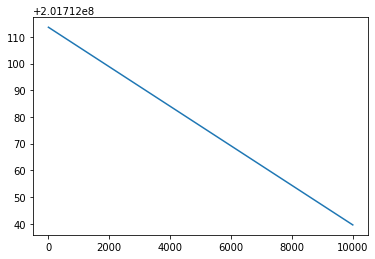

In [12]:
plt.plot(costs)

### Test

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

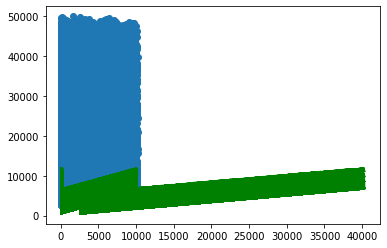

In [13]:
plt.scatter(X_test[:,3], y_test)
plt.plot(X_test, X_test @ theta, color='green')
plt.plot

### Cross Validation

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

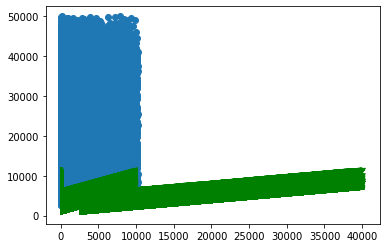

In [14]:
plt.scatter(X_cv[:,3], y_cv)
plt.plot(X_cv, X_cv @ theta, color='green')
plt.plot

In [15]:
min(costs)

201712039.52910888

## Polinomio 3

In [16]:
df['C1_3'] = df['C1'] ** 3
df['C2_3'] = df['C2'] ** 3

In [17]:
y = df[['C3']].to_numpy()
X = df[['Cons','C1','C2','C1_2','C2_2','C1_3','C2_3']].to_numpy()
print(X.shape, y.shape)

(159999, 7) (159999, 1)


In [18]:
np.random.shuffle(X)
np.random.shuffle(y)

In [19]:
#Train 70% 
#Train 15% 
#Train 15% 

X_train = X[:111999]
X_test = X[112000:135999]
X_cv = X[136000:159999]

y_train = y[:111999]
y_test = y[112000:135999]
y_cv = y[136000:159999]

In [20]:
m, n = X_train.shape

In [21]:
theta_0 = np.random.rand(n,1)
print(theta_0.shape)

(7, 1)


In [22]:
theta2, costs2, thetas2 = gradient_descent(X_train,y_train,theta_0,linear_cost,linear_cost_gradient, learning_rate = 0.00000000000001, threshold = 0.000001, max_iter=10000, lambdaparam = 2)

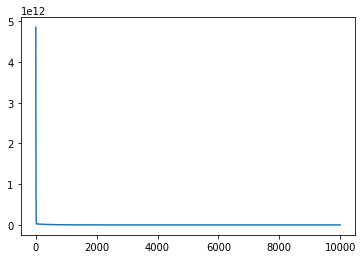

In [23]:
plt.plot(costs2)

### Test

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

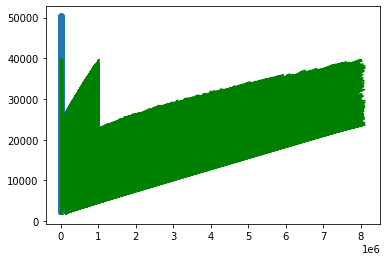

In [24]:
plt.scatter(X_test[:,3], y_test)
plt.plot(X_test, X_test @ theta2, color='green')
plt.plot

### Cross Validation

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

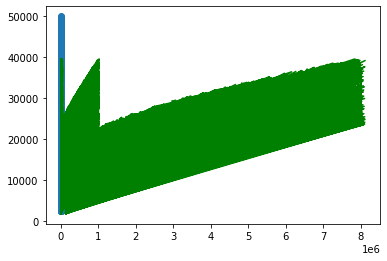

In [25]:
plt.scatter(X_cv[:,3], y_cv)
plt.plot(X_cv, X_cv @ theta2, color='green')
plt.plot

In [26]:
min(costs2)

111278502.32254706

## Polinomio 5

In [27]:
df['C1_5'] = df['C1'] ** 5
df['C2_5'] = df['C2'] ** 5

In [28]:
y = df[['C3']].to_numpy()
X = df[['Cons','C1','C2','C1_2','C2_2','C1_3','C2_3']].to_numpy()
print(X.shape, y.shape)

(159999, 7) (159999, 1)


In [29]:
np.random.shuffle(X)
np.random.shuffle(y)

In [30]:
#Train 70% 
#Train 15% 
#Train 15% 

X_train = X[:111999]
X_test = X[112000:135999]
X_cv = X[136000:159999]

y_train = y[:111999]
y_test = y[112000:135999]
y_cv = y[136000:159999]

In [31]:
m, n = X_train.shape

In [32]:
theta_0 = np.random.rand(n,1)
print(theta_0.shape)

(7, 1)


In [33]:
theta3, costs3, thetas3 = gradient_descent(X_train,y_train,theta_0,linear_cost,linear_cost_gradient, learning_rate = 0.0000000000000001, threshold = 0.000000001, max_iter=10000, lambdaparam = 2)

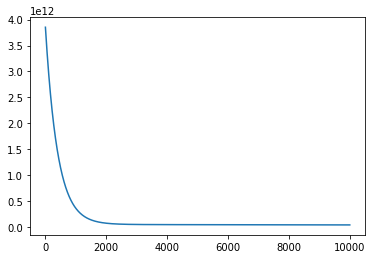

In [34]:
plt.plot(costs3)

### Test

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

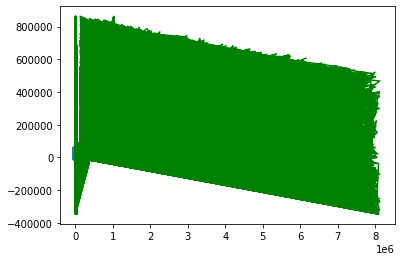

In [35]:
plt.scatter(X_test[:,3], y_test)
plt.plot(X_test, X_test @ theta3, color='green')
plt.plot

### Cross Validation

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

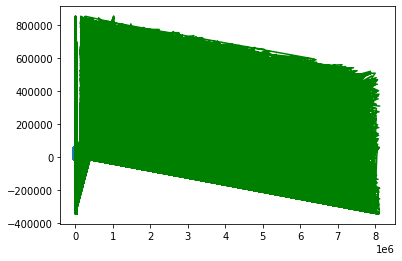

In [36]:
plt.scatter(X_cv[:,3], y_cv)
plt.plot(X_cv, X_cv @ theta3, color='green')
plt.plot

In [37]:
min(costs3)

38008403091.00509

## Decisión: Polinomio de Grado 3

Con base a los costos que obtenemos, el polinomio de grado 3 nos devuelve el mejor costo mínimo, también para los polinomios se utilizó un lambda de 2 ya que con este valor se evita que exista overfitting, underfitting y así reducimos el bias que podemos ver en los modelos, por medio de las gráficas.